In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
data = open('hafez.txt',encoding="utf8").read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 100)           888300    
_________________________________________________________________
bidirectional (Bidirectional (None, 12, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 12, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 4441)              448541    
_________________________________________________________________
dense_1 (Dense)              (None, 8883)              39458286  
Total params: 41,256,727
Trainable params: 41,256,727
Non-trainable params: 0
____________________________________________

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 54955 samples
Epoch 1/10
54955/54955 [==============================] - 1217s 22ms/sample - loss: 7.3204 - accuracy: 0.0380
Epoch 2/10
54955/54955 [==============================] - 1286s 23ms/sample - loss: 7.0518 - accuracy: 0.0428
Epoch 3/10
54955/54955 [==============================] - 1385s 25ms/sample - loss: 6.9078 - accuracy: 0.0470
Epoch 4/10
54955/54955 [==============================] - 1344s 24ms/sample - loss: 6.7733 - accuracy: 0.0519
Epoch 5/10
54955/54955 [==============================] - 1409s 26ms/sample - loss: 6.6466 - accuracy: 0.0589
Epoch 6/10
54955/54955 [==============================] - 1322s 24ms/sample - loss: 6.5060 - accuracy: 0.0664
Epoch 7/10
54955/54955 [==============================] - 1303s 24ms/sample - loss: 6.3692 - accuracy: 0.0741
Epoch 8/10
54955/54955 [==============================] - 1356s 25ms/sample - loss: 6.2423 - accuracy: 0.0820
Epoch 9/10
54955/54955 [==============================] - 1316s 24ms/sample - loss: 6.1275 - accu

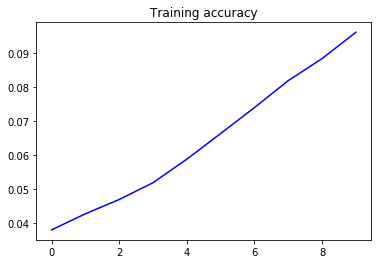

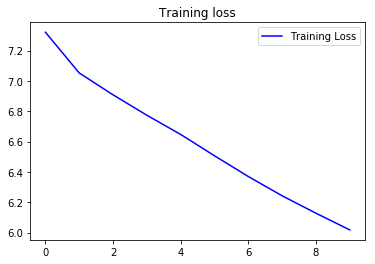

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "سحر بلبل خوش نوا"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

سحر بلبل خوش نوا و و و و و و و و و زلف تو است و و دل و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و و تو و
